In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)

from ann.plotting import figsize, savefig, subplots
from ann.timeseries import *

Using Theano backend.


# Generate Time Series

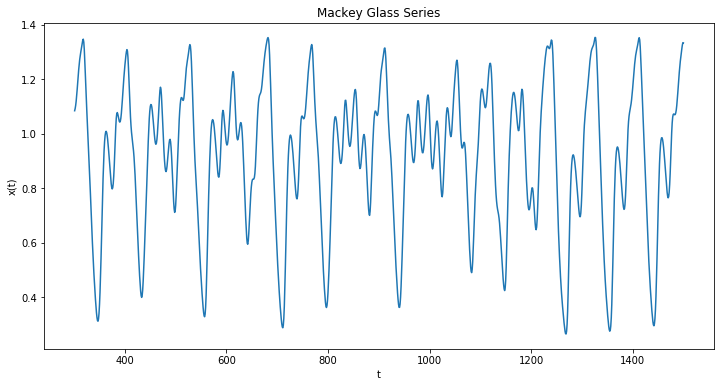

In [2]:
t = np.arange(301, 1501)
x = mackey_glass(np.arange(1506), theta=25)

_, ax = subplots(1, 1, size=figsize(1, 2))

ax.plot(t, x[t])

ax.set_title("Mackey Glass Series")
ax.set_xlabel("t")
ax.set_ylabel("x(t)")

plt.show()

# Create Training and Test Data

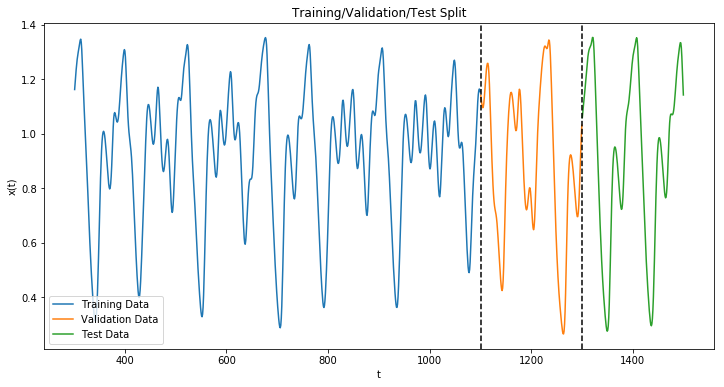

In [3]:
patterns = np.array([x[t - offs] for offs in [20, 15, 10, 5, 0]])
targets = x[t + 5]

n_train = 800
n_val = 200
n_test = 200

dataset = TimeSeriesDataset(t, patterns, targets, n_train, n_val)

dataset.preview()

savefig('mackey_glass.svg')

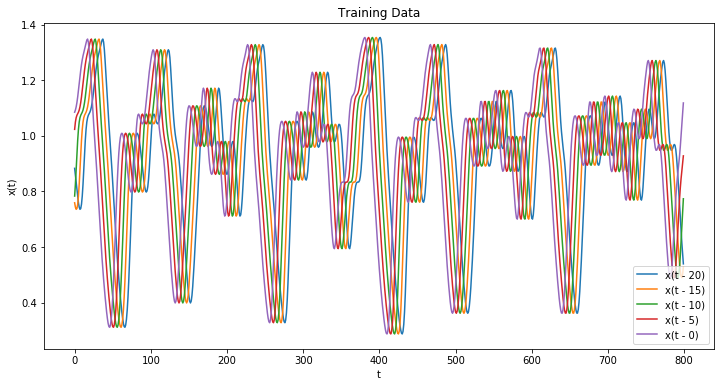

In [4]:
samples = [np.array(s) for s in zip(*dataset.patterns_train.T)]
    
_, ax = subplots(1, 1, size=figsize(1, 2))
    
for s, offs in zip(samples, [20, 15, 10, 5, 0]):
    ax.plot(s, label="x(t - {})".format(offs))
    
ax.set_title("Training Data")
ax.set_xlabel("t")
ax.set_ylabel("x(t)")

ax.legend()

plt.show()

# Train and Evaluate Different Network Configurations

profiling: alpha = 0.0
profiling: alpha = 0.0001
profiling: alpha = 0.001
profiling: alpha = 0.01


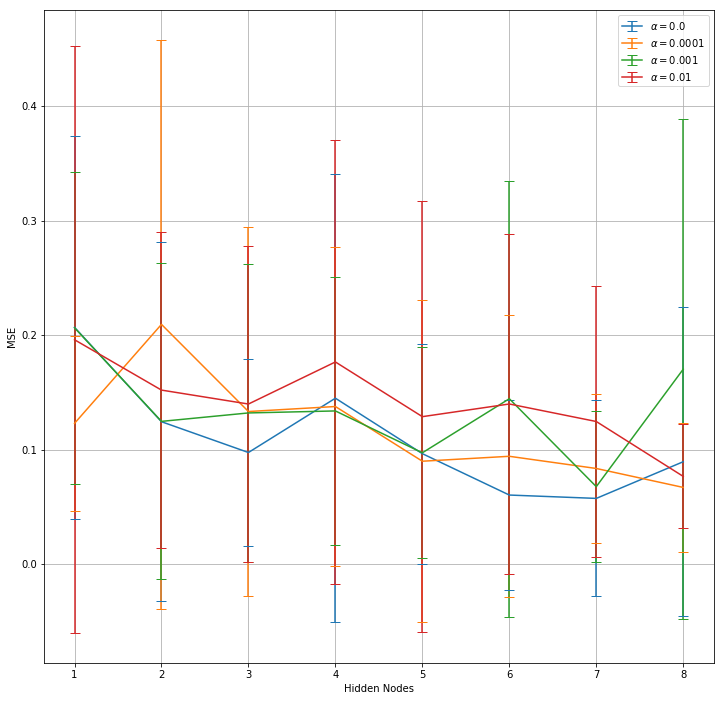

In [5]:
evaluate_networks(dataset,
                  hidden_nodes=range(1, 9),
                  regularization=np.concatenate(([0], np.logspace(-4, -2, 3))))

savefig('timeseries_configurations_regularized_nostop.svg')

profiling: alpha = 0.0
profiling: alpha = 0.0001
profiling: alpha = 0.001
profiling: alpha = 0.01


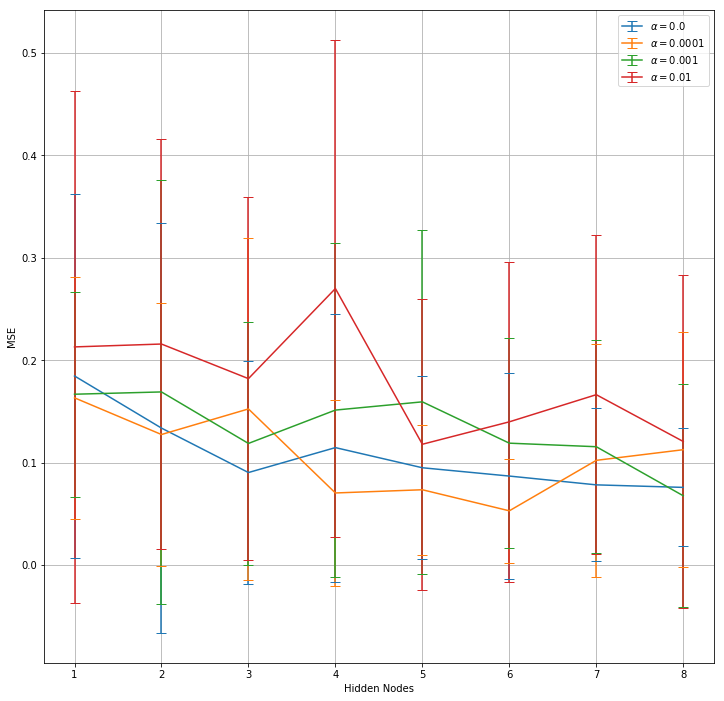

In [6]:
evaluate_networks(dataset,
                  hidden_nodes=range(1, 9),
                  regularization=np.concatenate(([0], np.logspace(-4, -2, 3))))

savefig('timeseries_configurations_regularized.svg')

# Search For Best Model

In [7]:
evaluate_networks_table(dataset,
                        hidden_nodes=range(1, 9),
                        regularization=np.concatenate(([0], np.logspace(-4, -2, 3))))

HN   REG         ETR (Mean)  ETR (Std)   EV (Mean)   EV (Std)    ET (Mean)   ET (Std)    EP (Mean)   EP (Std)    
1    0.00e+00    1.20e-01    1.11e-01    1.27e-01    1.04e-01    1.50e-01    1.18e-01    46.95       37.70       
1    1.00e-04    1.38e-01    1.05e-01    1.50e-01    1.03e-01    1.71e-01    1.12e-01    32.55       22.07       
1    1.00e-03    1.64e-01    1.43e-01    1.78e-01    1.44e-01    1.95e-01    1.51e-01    37.80       30.92       
1    1.00e-02    1.91e-01    1.63e-01    2.13e-01    1.57e-01    2.29e-01    1.65e-01    36.80       24.60       
2    0.00e+00    1.60e-01    1.76e-01    1.74e-01    1.78e-01    1.91e-01    1.83e-01    41.20       36.92       
2    1.00e-04    1.70e-01    2.06e-01    1.80e-01    2.02e-01    1.98e-01    2.12e-01    50.05       35.88       
2    1.00e-03    1.52e-01    1.44e-01    1.70e-01    1.59e-01    1.84e-01    1.54e-01    43.25       33.64       
2    1.00e-02    1.66e-01    1.71e-01    1.86e-01    1.67e-01    2.02e-01    1.73e-01   

In [8]:
evaluate_networks_table(dataset,
                        hidden_nodes=5,
                        regularization=np.concatenate(([0], np.logspace(-4, -2, 3))),
                        runs=100)

HN   REG         ETR (Mean)  ETR (Std)   EV (Mean)   EV (Std)    ET (Mean)   ET (Std)    EP (Mean)   EP (Std)    
5    0.00e+00    1.06e-01    1.35e-01    1.16e-01    1.48e-01    1.30e-01    1.46e-01    55.21       34.24       
5    1.00e-04    7.57e-02    8.15e-02    8.31e-02    8.51e-02    9.85e-02    9.23e-02    59.67       35.49       
5    1.00e-03    1.09e-01    1.17e-01    1.18e-01    1.24e-01    1.34e-01    1.28e-01    51.44       34.12       
5    1.00e-02    1.08e-01    1.10e-01    1.18e-01    1.08e-01    1.39e-01    1.13e-01    64.76       34.88       


In [ ]:
evaluate_networks_table(dataset,
                        hidden_nodes=7,
                        regularization=np.concatenate(([0], np.logspace(-4, -2, 3))),
                        stop_early=False,
                        runs=100)

HN   REG         ETR (Mean)  ETR (Std)   EV (Mean)   EV (Std)    ET (Mean)   ET (Std)    EP (Mean)   EP (Std)    
7    0.00e+00    2.95e-02    1.56e-02    3.68e-02    2.15e-02    4.64e-02    2.67e-02    100.00      0.00        
7    1.00e-04    2.76e-02    1.47e-02    3.43e-02    2.02e-02    4.32e-02    2.53e-02    100.00      0.00        
7    1.00e-03    3.06e-02    1.53e-02    3.83e-02    2.11e-02    4.85e-02    2.59e-02    100.00      0.00        
7    1.00e-02    4.51e-02    7.93e-03    5.86e-02    1.11e-02    7.40e-02    1.31e-02    100.00      0.00        


# Analyse Influence of Regularization on Weight Distribution

In [ ]:
weights = evaluate_weight_distribution(dataset, regularization=[0.0001, 0.001, 0.01], runs=100)

plt.tight_layout()

savefig('timeseries_weight_distribution.svg')

# Perform Final Evaluation on Test Set

In [ ]:
_, ax = subplots(1, 1)

evaluate_generalization(dataset, hidden_nodes=5, regularization=0, epochs=10000, final=True, runs=1, ax=ax)

savefig('timeseries_evalutation.svg')